<a href="https://colab.research.google.com/github/rodrigowe1988/Portfolio-Data-Science/blob/main/Analisando_os_crimes_do_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução para o Projeto
* Você deve importar o pandas e importar a base de dados da Polícia Militar do Rio de Janeiro sobre a violência
  * O arquivo csv se encontra no endereço abaixo:
    * [https//raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv]
      * este arquivo foi pré-processado para focar nos pontos deste módulo 
  * Este é o site oficial do Governo do Estado do Rio de Janeiro:
    * [http://www.ispdados.rj.gov.br/estatistica.html](http://www.ispdados.rj.gov.br/estatistica.html)
  * Um dashboard interativo e visual pode ser encontrado no site abaixo: 
    * [http://www.ispvisualizacao.rj.gov.br/index.html](http://www.ispvisualizacao.rj.gov.br/index.html)
  * Você está livre para apagar, alterar e acresentar o que quiser


#Analisando a violência do Estado do Rio de Janeiro


<center><img alt="Foto aérea da cidade do Rio de Janeiro" width="100%" src="https://papeldeparede.gratis/wp-content/uploads/2018/08/rio-de-janeiro-divulga%C3%A7%C3%A3o.jpg"></center>

Apesar do apelido 'Cidade Maravilhosa' que inspirou a canção homônima de Caetano Veloso, Rio de Janeiro também sempre foi mundialmente conhecida quando o assunto é falta de segurança. E não é somente a capital que sofre com esse mal. A violência no estado inteiro tem níveis alarmantes.  

Utilizo-me desse artigo para analisar o banco de dados sobre da Segurança Pública do Estado do Rio de Janeiro para estudo de Ciência de Dados.



##Obtenção dos Dados

O dados utilizados são os fornecidos pelo site oficial do Governo do Estado do Rio de Janeiro.

* [http://www.ispdados.rj.gov.br/estatistica.html](http://www.ispdados.rj.gov.br/estatistica.html)

## Importando os dados

In [ ]:
#importando os pacotes necessários
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

##Análise Inicial dos Dados

Breve contextualização...

Descreva e execute as seguintes etapas: 

* Qual o tamanho do seu DataFrame(shape)

* Extrair e imprimir os nomes das colunas(columns)
    
* Quais os tipos das variáveis(dtypes)
    
* Visualizar as 5 primeiras linhas(head)
    
* Identifique a porcentagem de valores ausentes das colunas

Vamos verificar as dimensões do nosso dataset...


In [ ]:
#tamanho do DataFrame utilizado nesse artigo
df.shape

(344, 56)

###Abaixo todas as colunas da nossa tabela são mostrados, com todas as crimes cometidas (contra a vida, contra o patrimônio,...)

In [ ]:
#imprimir na tela o nome das colunas da tabela
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [ ]:
#imprimindo os tipos de variáveis da tabela
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [ ]:
#importando as 5 primeiras linhas da tabela 
df.rename(columns={"vano": "Ano"})
df.head()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Perceba que no cabeçalho acima são mostrados os 5 primeiros meses de 1991. Nele podemos notar que alguns crimes ainda não estavam contabilizados pelo órgão que coletou os dados.

Aproveito essa oportunidade para deixa claro como a maioria dos bancos de dados possui campos ausentes. Muitos, como nessa tabela, foram criados e com o tempo foi adicionadas novas colunas sendo as entradas antigas não preenchidas por falta de dados.

Se atualmente ainda há uma falta de dados, imagine como era precária a situção no início da década de 90.

In [ ]:
df.set_index('vano', inplace=True)

In [ ]:
#porcentagem de valores ausentes em cada coluna 
df.isnull().sum() / df.shape[0] * 100

mes                            0.000000
hom_doloso                     0.000000
lesao_corp_morte              27.906977
latrocinio                     0.000000
hom_por_interv_policial       24.418605
tentat_hom                     0.000000
lesao_corp_dolosa              0.000000
estupro                       41.860465
hom_culposo                   24.418605
lesao_corp_culposa            27.906977
roubo_comercio                 0.000000
roubo_residencia               0.000000
roubo_veiculo                  0.000000
roubo_carga                    0.000000
roubo_transeunte               0.000000
roubo_em_coletivo              0.000000
roubo_banco                    0.000000
roubo_cx_eletronico           41.860465
roubo_celular                 31.395349
roubo_conducao_saque          41.860465
roubo_apos_saque              41.860465
roubo_bicicleta               80.232558
outros_roubos                  0.000000
total_roubos                   0.000000
furto_veiculos                 0.000000


##Informações Estatísticas da Violência no Rio de Janeiro

Descreva e execute as seguintes etapas:

* Imprima o resumo estatístico do seu DataFrame(`describe`)

* Encontre as médias das seguintes variáveis(colunas):

  * `roubo_veiculo`;

  * `furto_veiculos`;

  * `recuperacao_veiculos`;

* Calcule qual a porcentagem de carros recuperados em relação aos carros roubados + carros furtados:

  * $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$

* Encontre os valores máximos (`max`) e mínimos (`min`) da coluna `hom_doloso`









In [ ]:
#no resumo estatístico podemos analisar a quantidade de cada crime, e também dados como média, desvio padrão máxima, mínima,...
df.describe()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000,285.500000,2788.500000,592.000000,4.500000,3.000000,717.500000,10.000000

In [ ]:
df.recuperacao_veiculos.sum() / (df.roubo_veiculo.sum() + df.furto_veiculos.sum())

0.42980346705075084

###Para auxiliar e deixar como comando básico podemos acessar cada uma das colunas e consultar diretamente sua máxima e mínima:

* Nesse caso foi usada como exemplo a coluna de homicídio doloso (`hom_doloso`)

In [ ]:
print(f'A quantidade mínima de homicídios que ocorreu por ano foi de {df.hom_doloso.min()}.')
print(f'A quantidade máxima foi de {df.hom_doloso.max()}.')

A quantidade mínima de homicídios que ocorreu por ano foi de 272.
A quantidade máxima foi de 831.


###Médias de Roubo de veículos, de furto de veículos e de recuperação de veículos 

In [ ]:
mean_roubo_veiculo = round(df.roubo_veiculo.mean(), 2)
print('A média de roubo de veículos é de {}/mês.'.format(mean_roubo_veiculo))

A média de roubo de veículos é de 2448.7/mês.


In [ ]:
mean_furto_veiculos = round(df.furto_veiculos.mean(), 2)
print('A média de furto de veículos é {}/mês.'.format(mean_furto_veiculos))

A média de furto de veículos é 1674.67/mês.


In [ ]:
mean_recuperacao_veiculos = round(df.recuperacao_veiculos.mean(), 2)
print('A média de recuperação de veículos é de {} ao mês.'.format(mean_recuperacao_veiculos))

A média de recuperação de veículos é de 1772.24 ao mês.


In [ ]:
#total de veículos perdidos
total_sinistros = mean_roubo_veiculo + mean_furto_veiculos
print('Média de Veículos Perdidos por Mês: {:.2f} '.format(total_sinistros))

#porcentagem de veículos recuperados
pct = mean_recuperacao_veiculos / total_sinistros * 100

print('Somente {:.2f}% dos veículos roubados ou furtados são recuperados.'.format(pct))

Média de Veículos Perdidos por Mês: 4123.37 
Somente 42.98% dos veículos roubados ou furtados são recuperados.


##Visualização de Dados

No gráfico1 podemos visualizar o histograma utilizando como métrica a quantidade de homicídios dolosos.

Já no gráfico2, temos um gráfico de linha que representa a quantidade de roubos ocorrridos em transportes coletivos.

Plote e comente os seguintes gráficos:

* Histograma de `hom_doloso`

* Gráfico de linhas para a variável `roubo_em_coletivo`


###Analisando o gráfico a seguir pode-se notar que a maior concentração de homicídios dolosos(onde há a intenção de matar) se encontra entre 400 a 600 casos.

* no eixo x temos a quantidade de homicídios;

* no eixo y temos a quantidade de meses que atingiram esse número de casos;

* foram menos de 10 meses em que ocorreram 800 ou mais homicídios do tipo doloso

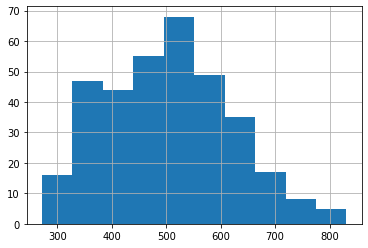

In [ ]:
df.hom_doloso.hist();

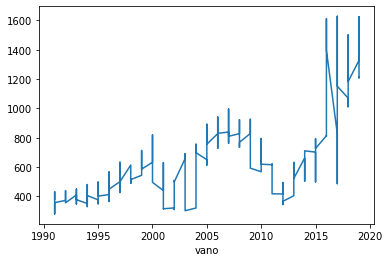

In [ ]:
df.roubo_em_coletivo.plot();

#Conclusão

Através desse artigo podemos atentar a alguns comando básicos para o tratamento de uma base de dados. Extração de dados é uma das tarefas mais importantes atualmente para o aumento do lucro. Tanto que dados estão sendo considerados o novo petróleo.

Esse dataset pode facilmente ser replicado e também pode ser utilizado como esqueleto futuramente para a análise de outros arquivos, basta somente fazer as adaptações necessárias.

* nome de variáveis(colunas), entre outras...